### Importing Libraries

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### Data Preprocessing
Training Image preprocessing

In [3]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


### Validation Image Preprocessing

In [4]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [5]:
# To avoid Overshooting Loss function
# Choose small learning rate default 0.001 here we have taken 0.0001
# There may be chance of underfitting so increase number of neuron
# Add more Convolutional Layer to extract more feature from images there may be possibilty that model unable to capture relevant feature or model is confusing due to lack of feature so feed with more feature

In [6]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [7]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[255.   255.   255.  ]
   [254.   254.   254.  ]
   [254.   254.   254.  ]
   ...
   [255.   255.   255.  ]
   [255.   255.   255.  ]
   [255.   255.   255.  ]]

  [[255.   255.   255.  ]
   [254.   254.   254.  ]
   [254.   254.   254.  ]
   ...
   [255.   255.   255.  ]
   [255.   255.   255.  ]
   [255.   255.   255.  ]]

  [[255.   255.   255.  ]
   [254.   254.   254.  ]
   [254.   254.   254.  ]
   ...
   [255.   255.   255.  ]
   [255.   255.   255.  ]
   [255.   255.   255.  ]]

  ...

  [[255.   255.   255.  ]
   [255.   255.   255.  ]
   [255.   255.   255.  ]
   ...
   [255.   255.   255.  ]
   [255.   255.   255.  ]
   [255.   255.   255.  ]]

  [[255.   255.   255.  ]
   [255.   255.   255.  ]
   [255.   255.   255.  ]
   ...
   [255.   255.   255.  ]
   [255.   255.   255.  ]
   [255.   255.   255.  ]]

  [[255.   255.   255.  ]
   [255.   255.   255.  ]
   [255.   255.   255.  ]
   ...
   [255.   255.   255.  ]
   [255.   255.   255.  ]
   [255.   255.   25

In [8]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [9]:
model = Sequential()

In [10]:
## Building Convoultion Layer

In [11]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

C:\Users\Asus\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [13]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [14]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [15]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [16]:
model.add(Dropout(0.25)) #To avoid overfitting

In [17]:
model.add(Flatten())

In [18]:
model.add(Dense(units=1500,activation='relu'))

In [19]:
model.add(Dropout(0.4))

In [20]:
#Output Layer
model.add(Dense(units=38,activation='softmax'))

### Compiling Model

In [21]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │          57,038 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

### Model Training

In [23]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1224s 555ms/step - accuracy: 0.3726 - loss: 2.2520 - val_accuracy: 0.8398 - val_loss: 0.5074
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1215s 553ms/step - accuracy: 0.8349 - loss: 0.5238 - val_accuracy: 0.9062 - val_loss: 0.2949
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1229s 560ms/step - accuracy: 0.9042 - loss: 0.2946 - val_accuracy: 0.9184 - val_loss: 0.2557
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1298s 591ms/step - accuracy: 0.9326 - loss: 0.2068 - val_accuracy: 0.9253 - val_loss: 0.2387
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1206s 549ms/step - accuracy: 0.9492 - loss: 0.1539 - val_accuracy: 0.9424 - val_loss: 0.1897
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1245s 567ms/step - accuracy: 0.9654 - loss: 0.1084 - val_accuracy: 0.9516 - val_loss: 0.1596
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1174s 534ms/step - accuracy: 0.9704 - loss: 0.0939 - val_accuracy: 0.9611 - val_loss: 0.1252
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1184s 539ms/s

### Model Evaluation

In [24]:
#model evaluation on training set
train_loss,train_acc = model.evaluate(training_set)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 333s 152ms/step - accuracy: 0.9944 - loss: 0.0184


In [25]:
print(train_loss,train_acc)

0.016123183071613312 0.9951205849647522


In [26]:
#model on validation set
val_loss,val_acc = model.evaluate(validation_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 68s 124ms/step - accuracy: 0.9738 - loss: 0.0994


In [27]:
print(val_loss,val_acc)

0.09811550378799438 0.9720578193664551


In [31]:
model.save("trained_model.h5")

In [32]:
training_history.history

{'accuracy': [0.5807241201400757,
  0.8593499064445496,
  0.9133366346359253,
  0.9383028745651245,
  0.9547194242477417,
  0.9653744697570801,
  0.9727292060852051,
  0.973312497138977,
  0.9797282814979553,
  0.981677234172821],
 'loss': [1.4359586238861084,
  0.4446069002151489,
  0.2665954828262329,
  0.18899111449718475,
  0.13901039958000183,
  0.10511430352926254,
  0.0846293494105339,
  0.07938848435878754,
  0.06296824663877487,
  0.05670991912484169],
 'val_accuracy': [0.8398019671440125,
  0.9062144160270691,
  0.9183928966522217,
  0.9252788424491882,
  0.9423514604568481,
  0.9515706896781921,
  0.9611313343048096,
  0.9616435170173645,
  0.9503756165504456,
  0.9720578193664551],
 'val_loss': [0.5074020624160767,
  0.29490360617637634,
  0.25574442744255066,
  0.23874539136886597,
  0.18965786695480347,
  0.1596144139766693,
  0.12524791061878204,
  0.1287536919116974,
  0.1692756563425064,
  0.09811548888683319]}

In [33]:
#Recording History in json
import json
with open("training_history.json","w") as f:
    json.dump(training_history.history,f)

In [36]:
training_history.history['accuracy']

[0.5807241201400757,
 0.8593499064445496,
 0.9133366346359253,
 0.9383028745651245,
 0.9547194242477417,
 0.9653744697570801,
 0.9727292060852051,
 0.973312497138977,
 0.9797282814979553,
 0.981677234172821]

## Accuracy visualization

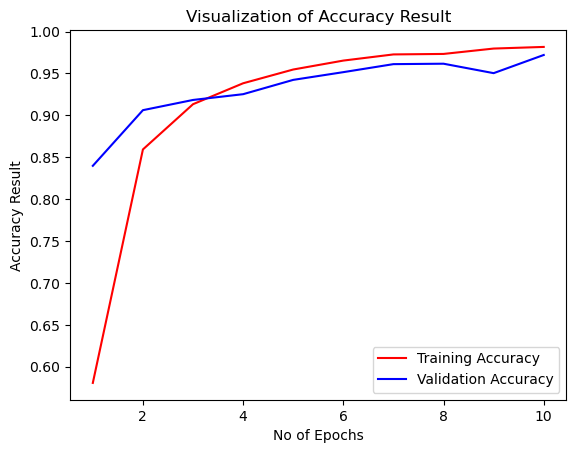

In [38]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel("No of Epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

## Some other metrics for model evaluation

In [41]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [42]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [43]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

550/550 ━━━━━━━━━━━━━━━━━━━━ 70s 127ms/step


(array([[1.0000000e+00, 1.6906673e-08, 1.1216814e-10, ..., 1.1453216e-14,
         5.7233657e-14, 7.4109127e-13],
        [9.9999893e-01, 1.0938027e-06, 2.1492298e-10, ..., 1.2347821e-15,
         5.4622444e-15, 9.9607470e-14],
        [1.0000000e+00, 1.5405903e-14, 2.4691381e-16, ..., 1.1484139e-23,
         1.6092841e-20, 6.9022571e-19],
        ...,
        [2.9967775e-10, 7.5399131e-12, 3.5001682e-10, ..., 1.1905178e-10,
         2.2880623e-13, 9.9999690e-01],
        [1.5098053e-09, 2.5224089e-12, 4.7384968e-10, ..., 4.6879745e-10,
         1.0794378e-12, 9.9999988e-01],
        [6.5194697e-17, 2.5048172e-17, 2.6313851e-15, ..., 7.4346841e-17,
         4.5439900e-15, 1.0000000e+00]], dtype=float32),
 (17572, 38))

In [44]:
predicted_categories = tf.argmax(y_pred, axis=1)

In [45]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [46]:
true_categories = tf.concat([y for x,y in test_set], axis=0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [48]:
Y_true = tf.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

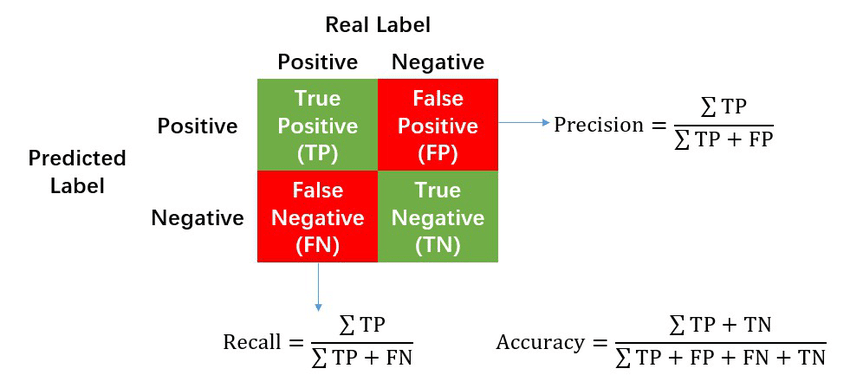

In [55]:
from sklearn.metrics import confusion_matrix,classification_report

In [56]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.93      0.98      0.96       504
                                 Apple___Black_rot       0.99      0.98      0.98       497
                          Apple___Cedar_apple_rust       0.98      0.97      0.98       440
                                   Apple___healthy       0.99      0.89      0.94       502
                               Blueberry___healthy       0.91      0.99      0.95       454
          Cherry_(including_sour)___Powdery_mildew       0.98      0.99      0.98       421
                 Cherry_(including_sour)___healthy       0.97      0.99      0.98       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.92      0.94      0.93       410
                       Corn_(maize)___Common_rust_       0.99      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.95      0.96      0.

In [57]:
cm = confusion_matrix(Y_true,predicted_categories)
cm.shape

(38, 38)

### Confusion Matrix Visualization

<Axes: >

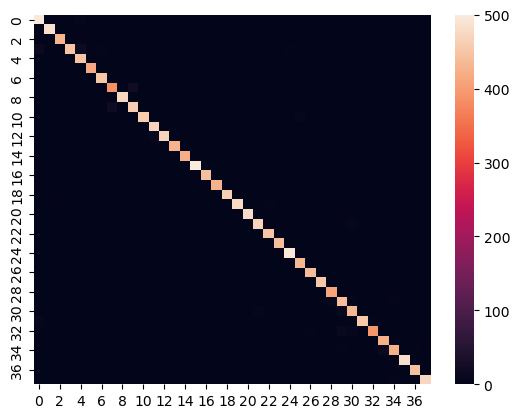

In [58]:
sns.heatmap(cm)

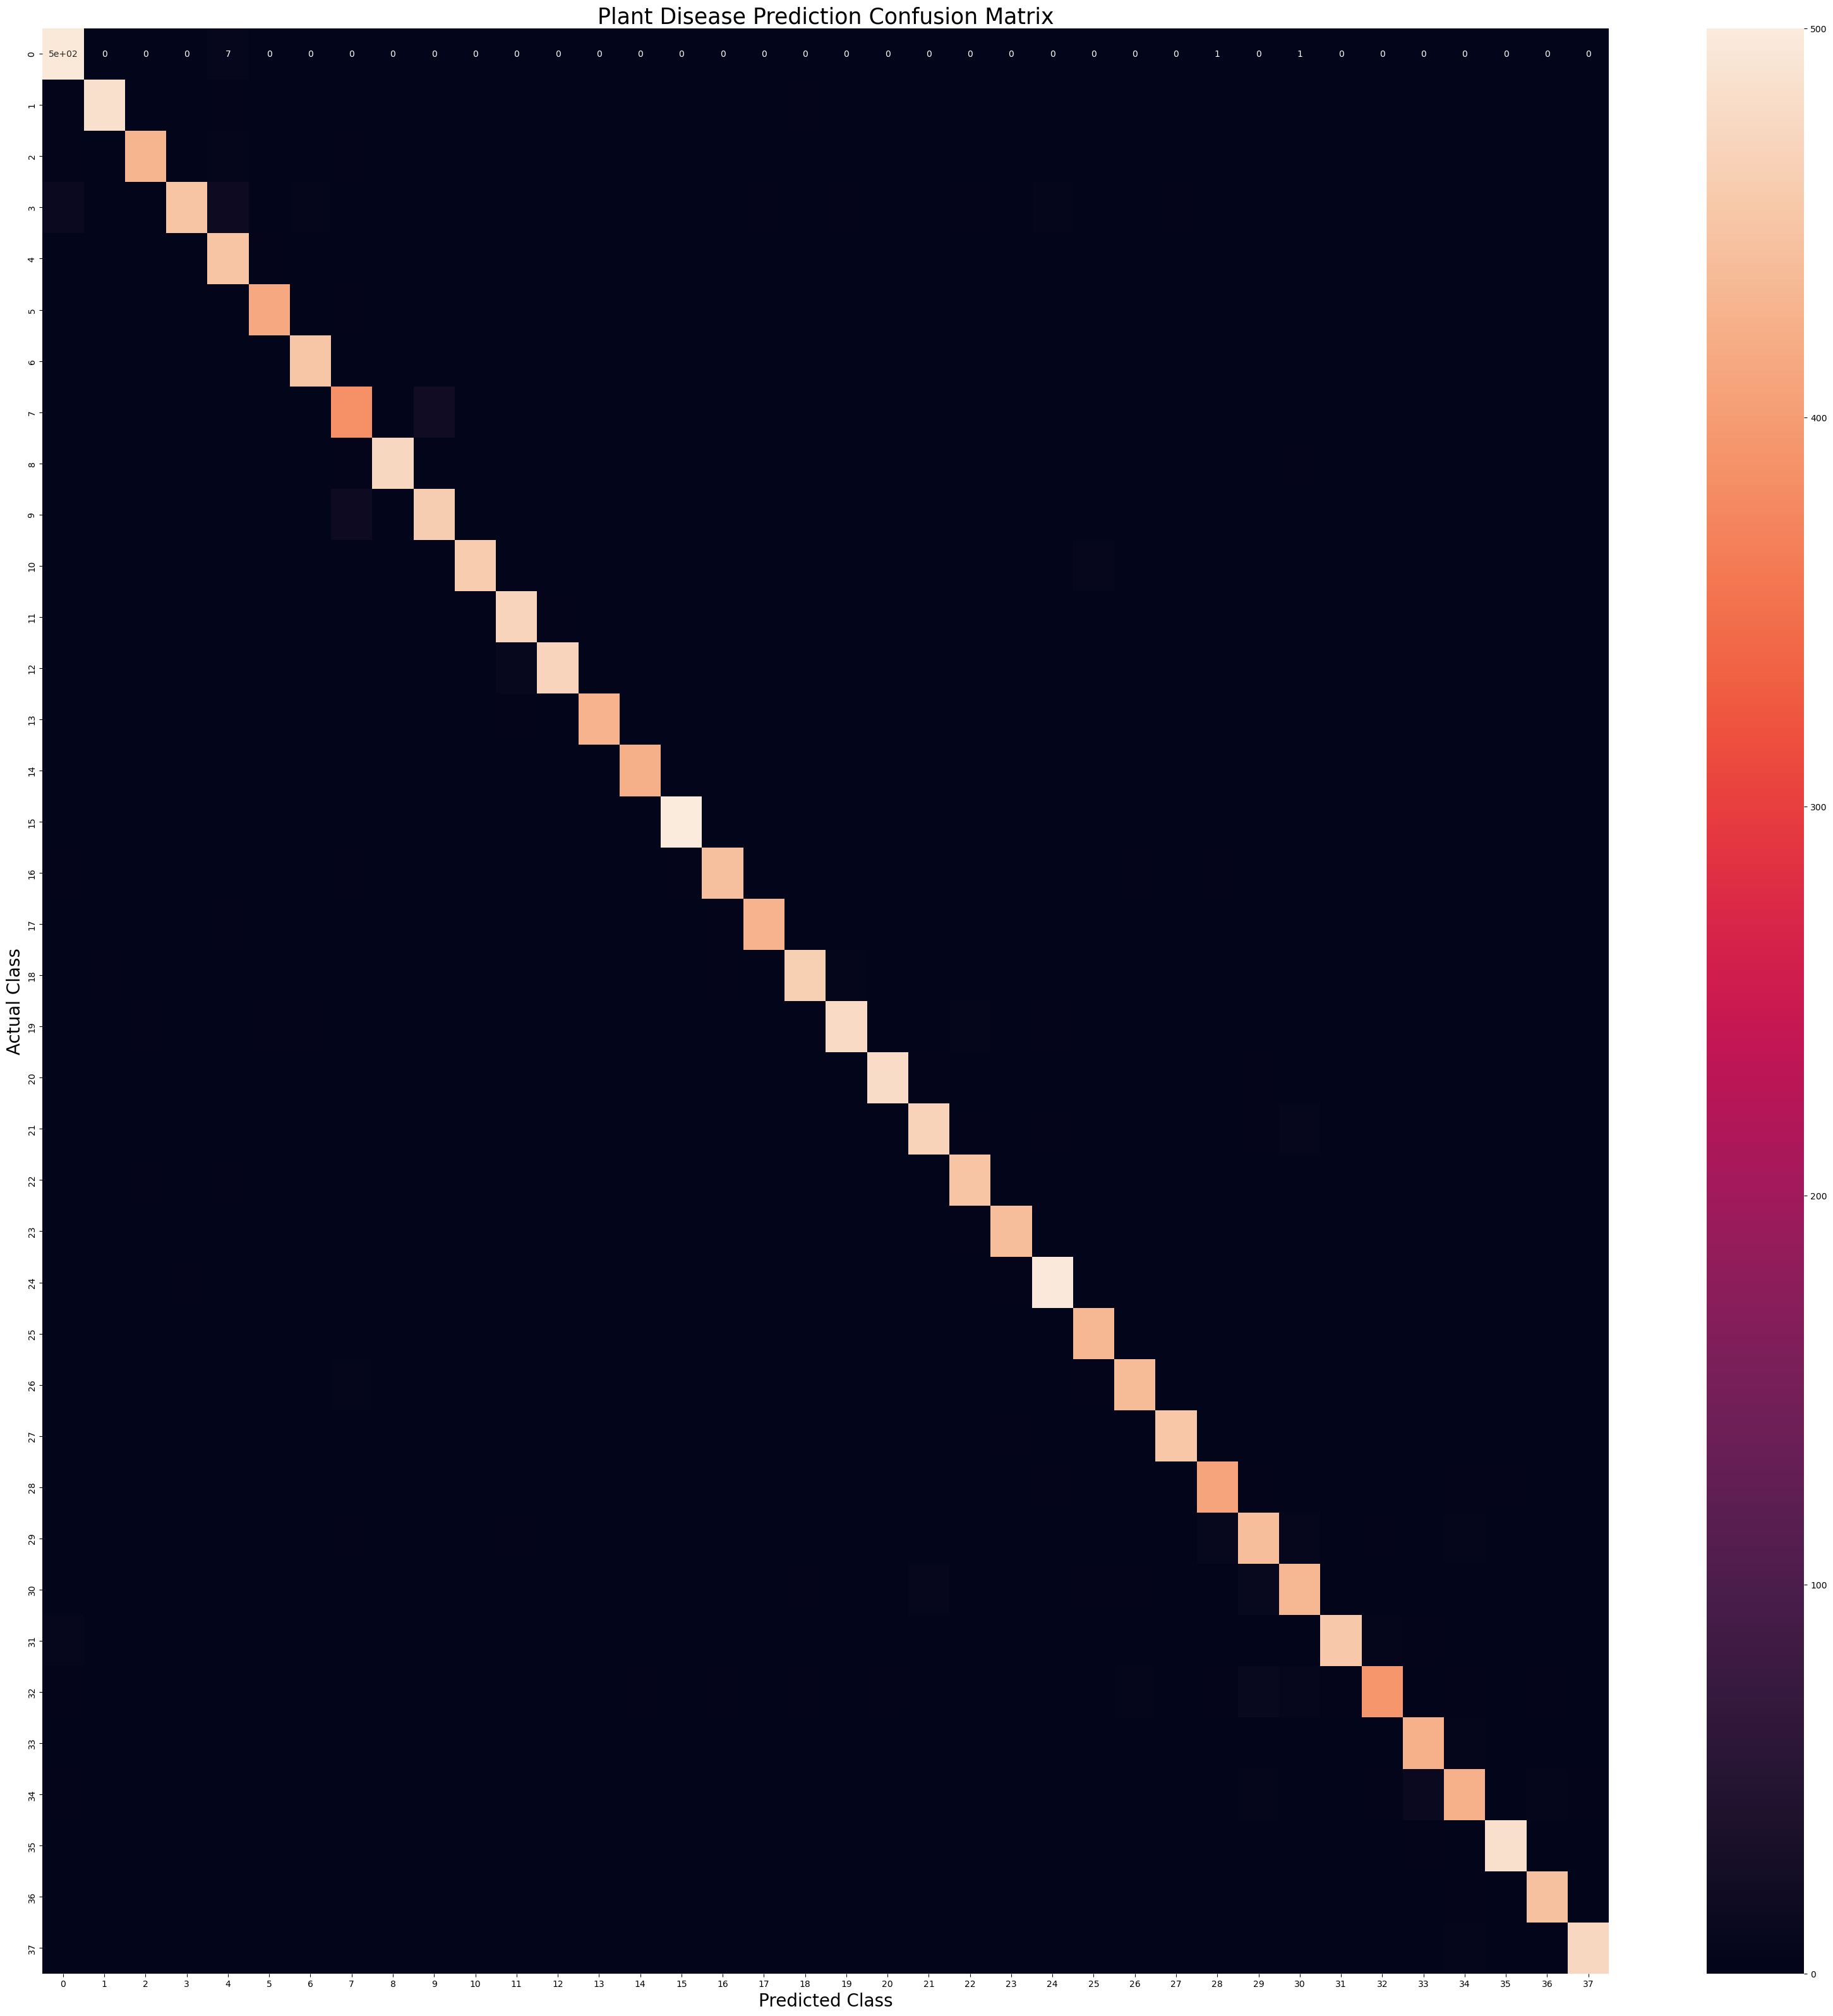

In [60]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={'size': 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()